# Jupyter Notebook: Parsing Excel file and Visualizing Data

In this notebook, we will load a Excel file, convert it to a pandas DataFrame, and then create visualizations using matplotlib.

In [1]:
pip install pandas matplotlib seaborn openpyxl


[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Load Excel File

In [3]:
# Load the Excel file into a Pandas DataFrame
df = pd.read_excel('Rate of violent victimizations by crime type 1993-2023 segmented by simple vs. non simple assault.xlsx')

# Inspect the data
print(df.info())

# Display the first few rows of the dataframe to check the data
df.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Year                                   62 non-null     int64  
 1   Crime Type                             62 non-null     object 
 2   Number                                 62 non-null     int64  
 3   Number CI Lower Bound                  62 non-null     int64  
 4   Number CI Upper Bound                  62 non-null     int64  
 5   Number SE                              62 non-null     int64  
 6   Rate per 1000 persons age 12 or older  62 non-null     float64
 7   Rate CI Lower Bound                    62 non-null     float64
 8   Rate CI Upper Bound                    62 non-null     float64
 9   Rate SE                                62 non-null     float64
dtypes: float64(4), int64(5), object(1)
memory usage: 5.0+ KB
None


,Year,Crime Type,Number,Number CI Lower Bound,Number CI Upper Bound,Number SE,Rate per 1000 persons age 12 or older,Rate CI Lower Bound,Rate CI Upper Bound,Rate SE
0,1993,Simple assault,10690657,9772613,11608701,468398,50.7,46.34,55.04,2.22
1,1994,Simple assault,11295896,10421120,12170672,446323,53.0,48.89,57.10,2.09
2,1995,Simple assault,10393989,9597668,11190311,406294,48.3,44.62,52.03,1.89
3,1996,Simple assault,9319628,8466052,10173204,435506,42.9,38.97,46.83,2.00
4,1997,Simple assault,8787623,7876611,9698635,464811,40.0,35.83,44.12,2.11
5,1998,Simple assault,8330313,7442708,9217918,452868,37.5,33.54,41.54,2.04
6,1999,Simple assault,7028277,6243561,7812993,400372,31.3,27.80,34.79,1.78
7,2000,Simple assault,5684995,5014867,6355122,341908,25.1,22.11,28.02,1.51
8,2001,Simple assault,4948619,4383139,5514099,288515,21.6,19.12,24.06,1.26
9,2002,Simple assault,5117836,4390780,5844891,370954,22.1,18.96,25.24,1.60


## Step 2: Clean and Prepare the Data

In [4]:
# Drop rows with missing values (if needed)
df.dropna(inplace=True)

# Ensure the 'Year' column is an integer and 'Value' is a float
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').fillna(0).astype(int)
print(df.isnull().sum())

# Display the cleaned data
df.head(15)

Year                                     0
Crime Type                               0
Number                                   0
Number CI Lower Bound                    0
Number CI Upper Bound                    0
Number SE                                0
Rate per 1000 persons age 12 or older    0
Rate CI Lower Bound                      0
Rate CI Upper Bound                      0
Rate SE                                  0
dtype: int64


,Year,Crime Type,Number,Number CI Lower Bound,Number CI Upper Bound,Number SE,Rate per 1000 persons age 12 or older,Rate CI Lower Bound,Rate CI Upper Bound,Rate SE
0,1993,Simple assault,10690657,9772613,11608701,468398,50.7,46.34,55.04,2.22
1,1994,Simple assault,11295896,10421120,12170672,446323,53.0,48.89,57.10,2.09
2,1995,Simple assault,10393989,9597668,11190311,406294,48.3,44.62,52.03,1.89
3,1996,Simple assault,9319628,8466052,10173204,435506,42.9,38.97,46.83,2.00
4,1997,Simple assault,8787623,7876611,9698635,464811,40.0,35.83,44.12,2.11
5,1998,Simple assault,8330313,7442708,9217918,452868,37.5,33.54,41.54,2.04
6,1999,Simple assault,7028277,6243561,7812993,400372,31.3,27.80,34.79,1.78
7,2000,Simple assault,5684995,5014867,6355122,341908,25.1,22.11,28.02,1.51
8,2001,Simple assault,4948619,4383139,5514099,288515,21.6,19.12,24.06,1.26
9,2002,Simple assault,5117836,4390780,5844891,370954,22.1,18.96,25.24,1.60


## Step 3: Plot Line Graphs Rate per 1000 persons age 12 or older

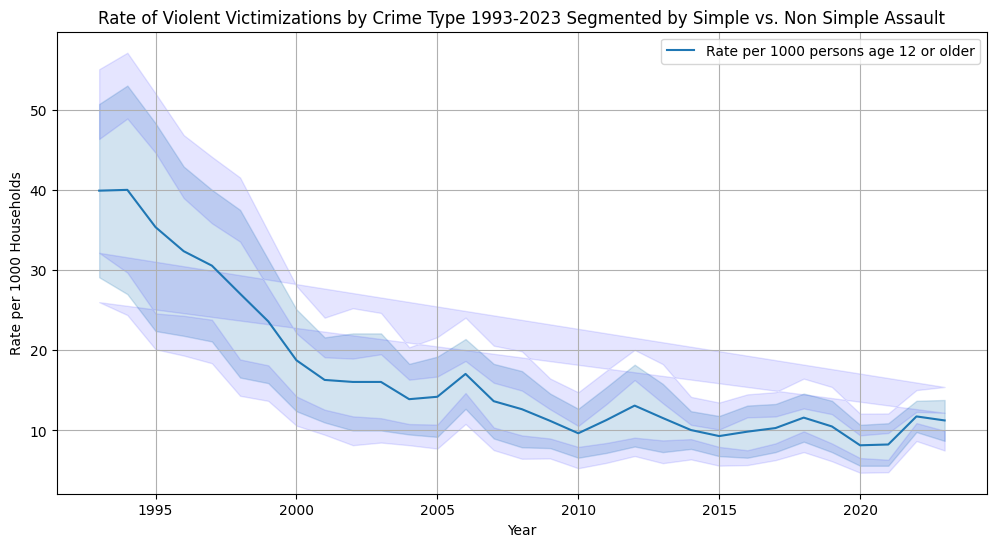

In [5]:
# Plot the 'Rate per 1000 households' over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Rate per 1000 persons age 12 or older', data=df, label='Rate per 1000 persons age 12 or older')
plt.fill_between(df['Year'], df['Rate CI Lower Bound'], df['Rate CI Upper Bound'], color='b', alpha=0.1)

# Add labels and title
plt.title('Rate of Violent Victimizations by Crime Type 1993-2023 Segmented by Simple vs. Non Simple Assault')
plt.xlabel('Year')
plt.ylabel('Rate per 1000 Households')

# Display the plot with a grid and legend
plt.grid(True)
plt.legend()
plt.show()

## Step 4: Plot Multiple Series Graphs Rate per 1000 persons age 12 or older

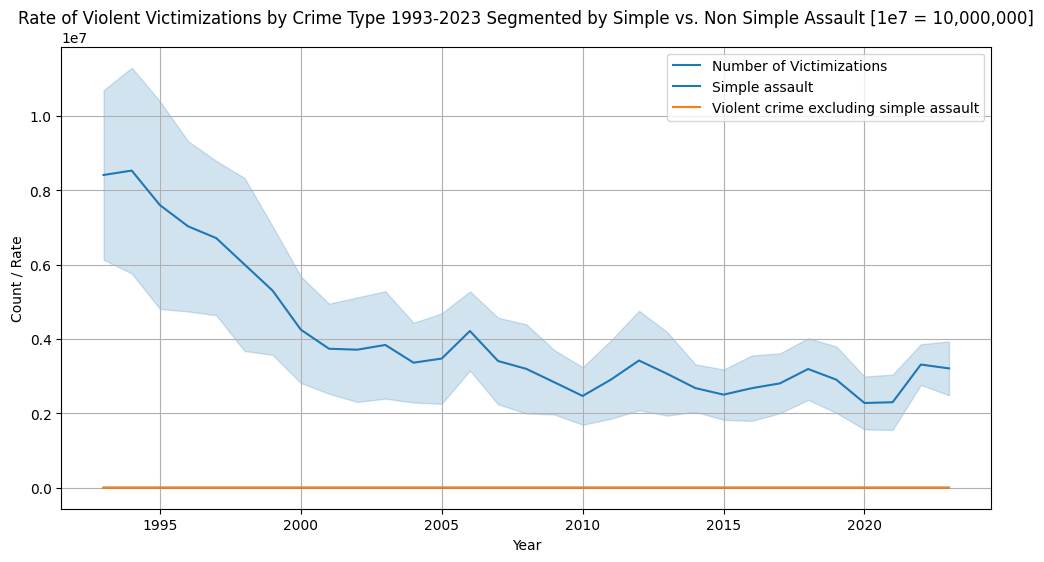

In [8]:
# Plot Multiple Series
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Number', data=df, label='Number of Victimizations')
sns.lineplot(x='Year', y='Rate per 1000 persons age 12 or older', hue='Crime Type', data=df)
plt.fill_between(df['Year'], df['Rate CI Lower Bound'], df['Rate CI Upper Bound'], color='b', alpha=0.1)

plt.title('Rate of Violent Victimizations by Crime Type 1993-2023 Segmented by Simple vs. Non Simple Assault [1e7 = 10,000,000]')
plt.xlabel('Year')
plt.ylabel('Count / Rate')
plt.grid(True)
plt.legend()
plt.show()